<a href="https://colab.research.google.com/github/evandwh/ST554---Spring-2026---NCSU/blob/main/Whitfield_ST554_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST554 - HW4**

**Author** - Evan Whitfield

**Class** - ST554

**Semester** - Spring 2026


# **Summarizing Data Numerically - HW3 Code**

[HW3 Notebook](https://colab.research.google.com/drive/1_xaz74anRJZEP5k0MSUovFv1xS-nU5rY?usp=sharing)

*Code is slightly modified due from original version*

## Read in the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


URL =  "https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt"

student_data = pd.read_csv(URL, sep = ";")

student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Summarize the data

### Categorical Variables

In this data set, I am interested in how the jobs of the parents of the student might affect their preformance/results.

In [ ]:
student_data.Fjob.value_counts(dropna = False)


,count
Fjob,
other,217
services,111
teacher,29
at_home,20
health,18


In [ ]:
student_data.Mjob.value_counts(dropna = False)


,count
Mjob,
other,141
services,103
at_home,59
teacher,58
health,34


Out of all of the students, 20 students had fathers that worked at home, while 59 had mothers that worked at home.

In [ ]:
student_data["Fjob_cat"] = student_data.Fjob.astype("category")
student_data["Mjob_cat"] = student_data.Mjob.astype("category")
student_data["guardian_cat"] = student_data.guardian.astype("category")

student_data.Fjob_cat = student_data.Fjob_cat.cat.rename_categories(["At Home", "Health", "Other", "Services", "Teacher"])
student_data.Mjob_cat = student_data.Mjob_cat.cat.rename_categories(["At Home", "Health", "Other", "Services", "Teacher"])
student_data.guardian_cat = student_data.guardian_cat.cat.rename_categories(["Father", "Mother", "Other"])

pd.crosstab(student_data.Fjob_cat, student_data.Mjob_cat)

Mjob_cat,At Home,Health,Other,Services,Teacher
Fjob_cat,,,,,
At Home,7,0,5,6,2
Health,2,6,2,4,4
Other,33,17,104,42,21
Services,15,10,24,43,19
Teacher,2,1,6,8,12


Only 7 of the students had both a mother and a father that worked from home. Meanwhile, 12 students had a mother and a father that were both Teachers.

In [ ]:
my_table = pd.crosstab(
    [student_data.guardian_cat, student_data.Fjob_cat],
    student_data.Mjob_cat,
    margins = True,
    rownames = ["Guardian","Father Job"],
    colnames = ["Mother Job"])

my_table

Mother Job           At Home  Health  Other  Services  Teacher  All
Guardian Father Job                                                
Father   At Home           2       0      3         0        0    5
         Health            0       4      2         1        0    7
         Other             3       4     20         6        1   34
         Services          5       3     11        13        3   35
         Teacher           0       0      3         4        2    9
Mother   At Home           5       0      2         4        2   13
         Health            1       2      0         3        4   10
         Other            26      11     74        34       19  164
         Services          9       7     10        25       15   66
         Teacher           2       1      3         4       10   20
Other    At Home           0       0      0         2        0    2
         Health            1       0      0         0        0    1
         Other             4       2     10         2        1   19
         Services          1       0      3         5        1   10
All                       59      34    141       103       58  395

Of the 12 students that had both a mother and a father listed as a teacher, 2 of them had their father listed as the guardian, while 10 had their mother listed as their guardian. No student had both parents as teachers, but had "Other" listed as their guardian.

Create a conditional two-way table.

I chose to create a conditional two-way table that mirrored my three-way table above, in order to check the results. Here, the father is listed as the guardian and it matches with the corresponding portion of the three-way table above.

In [ ]:
pd.crosstab(
    student_data.loc[student_data["guardian_cat"] == "Father", "Fjob_cat"],
    student_data.loc[student_data["guardian_cat"] == "Father", "Mjob_cat"],
    margins = True
)

Mjob_cat,At Home,Health,Other,Services,Teacher,All
Fjob_cat,,,,,,
At Home,2,0,3,0,0,5
Health,0,4,2,1,0,7
Other,3,4,20,6,1,34
Services,5,3,11,13,3,35
Teacher,0,0,3,4,2,9
All,10,11,39,24,6,90


Just to practice something different, I decided to do a subset of the table above by looking at only the students who had the father listed in the Other or Service job category. Again, this does not refill anything new from above and was chosen to check for correctness.

In [ ]:
my_table.loc[("Father", ("Other", "Services")), : ]

Mother Job           At Home  Health  Other  Services  Teacher  All
Guardian Father Job                                                
Father   Other             3       4     20         6        1   34
         Services          5       3     11        13        3   35

### Numerical Variables

#### Measures of center and Spread

I am interested in the mean and standard deviation of the three variables: "age", "absences", and "G3". I decided to run a for loop to find the summary statistics I desired for each of the three variables.

In [ ]:
vars = ["age", "absences", "G3"]
for i in vars:
    print("Mean of " + i + " is " + str(student_data[i].mean()))
    print("Standard Deviaition of " + i + " is " + str(student_data[i].std()) + "\n")


Mean of age is 16.696202531645568
Standard Deviaition of age is 1.2760427246056245

Mean of absences is 5.708860759493671
Standard Deviaition of absences is 8.003095687108177

Mean of G3 is 10.415189873417722
Standard Deviaition of G3 is 4.5814426109978434



To dive deeper into the numerical summary, I was interested if the gender of the student made an impact on the three variables of interest. Here, I decided to only look at the rows were "sex" == "F".

In [ ]:
for i in vars:
    print("Mean of " + i + " for females is " + str(student_data.loc[student_data["sex"] == "F", i].mean()))
    print("Standard Deviaition of " + i + " for females is " + str(student_data.loc[student_data["sex"] == "F", i].std()) +"\n")

Mean of age for females is 16.73076923076923
Standard Deviaition of age for females is 1.2016958164931697

Mean of absences for females is 6.216346153846154
Standard Deviaition of absences for females is 9.44581916132164

Mean of G3 for females is 9.966346153846153
Standard Deviaition of G3 for females is 4.622338337431135



#### Grouping by one variable.

Instead of only looking at the summary statistics of one gender, I decided to group the data by "sex" and look at the summary statistics across both genders.

I did it once using the methods for `.mean()` and `.std()`, and then one using `.pivot_table` for practicing and comparison.

In [ ]:
student_data.groupby("sex")[vars].mean()

,age,absences,G3
sex,,,
F,16.730769,6.216346,9.966346
M,16.657754,5.144385,10.914439


In [ ]:
student_data.groupby("sex")[vars].std()

,age,absences,G3
sex,,,
F,1.201696,9.445819,4.622338
M,1.356181,5.980749,4.495297


In [ ]:
pd.pivot_table(data = student_data, values = vars, index = "sex", aggfunc = ["mean", "std"])

mean                            std                    
            G3  absences        age        G3  absences       age
sex                                                              
F     9.966346  6.216346  16.730769  4.622338  9.445819  1.201696
M    10.914439  5.144385  16.657754  4.495297  5.980749  1.356181

Here, I noticed that the variables of interest were not ordered in the same way as the `vars` list was created. There must be some sort of inherent ordering that `.pivot_table` lists the values of interest. Requires further study.

#### Grouping by two variables.
After looking at gender, I wondered if `school` made any impact on the variables of interest.

Again, I did it two different ways. First, using the `.mean()` and `.std` methods, and then using the `.pivot_table()` method.

In [ ]:
student_data.groupby(["sex", "school"])[vars].mean()

age  absences         G3
sex school                                
F   GP      16.579235  6.639344   9.972678
    MS      17.840000  3.120000   9.920000
M   GP      16.457831  5.222892  11.060241
    MS      18.238095  4.523810   9.761905

In [ ]:
student_data.groupby(["sex", "school"])[vars].std()

age  absences        G3
sex school                              
F   GP      1.173426  9.852259  4.604622
    MS      0.746101  4.702127  4.846992
M   GP      1.263005  6.215695  4.594725
    MS      0.995227  3.669047  3.491486

In [ ]:
pd.pivot_table(data = student_data, values = vars, index = ["sex", "school"], aggfunc = ["mean", "std"])

mean                            std                    
                   G3  absences        age        G3  absences       age
sex school                                                              
F   GP       9.972678  6.639344  16.579235  4.604622  9.852259  1.173426
    MS       9.920000  3.120000  17.840000  4.846992  4.702127  0.746101
M   GP      11.060241  5.222892  16.457831  4.594725  6.215695  1.263005
    MS       9.761905  4.523810  18.238095  3.491486  3.669047  0.995227

#### Correlation

Finally, we were tasked with finding the correlation matrix relating all of the numerical variables in our data set. Probably to no ones surprise, there seems to be a high correlation between the G1, G2, and G3 variables.

In [ ]:
student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


,count
school,
GP,349
MS,46


# **HW4 - Task 1**

##Categorical Variables
Create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for
the plots.

I chose to do sex and school for my two categorical variables. It's not very exciting, but I was running out of time. These seem like easy variables to work with due to their binary nature in the dataset.

In [ ]:
student_data["schoolC"] = student_data.school.astype("category")
student_data["sexC"] = student_data.sex.astype("category")

student_data.schoolC = student_data.schoolC.cat.rename_categories(["GP", "MS"])
student_data.sexC = student_data.sexC.cat.rename_categories(["Female", "Male"])

stack_table = pd.crosstab(student_data.schoolC, student_data.sexC)
stack_table

sexC,Female,Male
schoolC,,
GP,183,166
MS,25,21


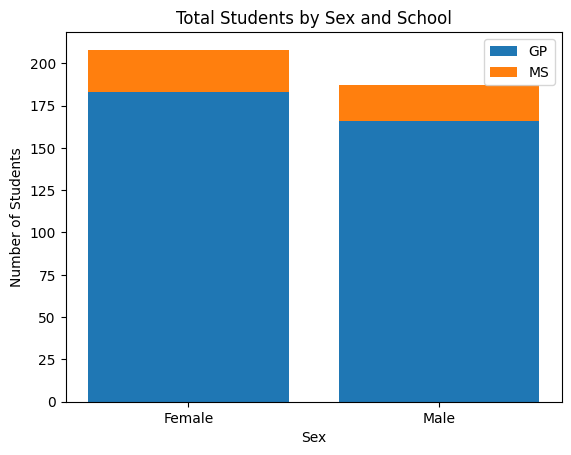

In [ ]:
plt.bar(
  x = student_data.sexC.cat.categories,
  height = stack_table.loc["GP", :],
  label = "GP")
plt.bar(
  x = student_data.sexC.cat.categories,
  height = stack_table.loc["MS", :],
  bottom = stack_table.loc["GP", :],
  label = "MS"
  )
plt.xlabel("Sex")
plt.ylabel("Number of Students")
plt.title("Total Students by Sex and School")
plt.legend(loc = 0)

Very similar distribution of school type among the sexes. More total females than males.

<Axes: xlabel='School', ylabel='Number enrolled'>

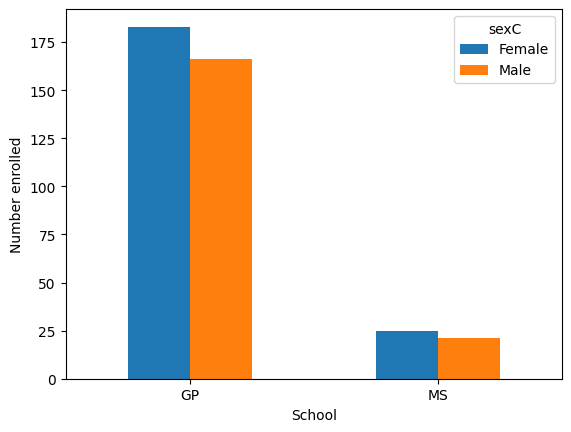

In [ ]:
#much simplier version
stack_table.plot.bar(stacked = False, rot = 0, xlabel = "School", ylabel = "Number enrolled")

More females in both schools. Many more students in GP than MS.

## Numerical Values
Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the
categorical variables (that is, create graphs that can compare the distributions across the groups). For
at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the
same plot. Add appropriate labels and titles.

### Histograms, Boxplots, Density
I apologize for the lack of details in my explanation. Time was real short!

In [ ]:
G1_male = student_data.loc[student_data.sexC == "Male", "G1"] #series for male G1 scores
G1_female = student_data.loc[student_data.sexC == "Female", "G1"] #series for female G1 score

G2_male = student_data.loc[student_data.sexC == "Male", "G2"] #series for male G2 scores
G2_female = student_data.loc[student_data.sexC == "Female", "G2"] #series for female G2 score

G3_male = student_data.loc[student_data.sexC == "Male", "G3"] #series for male G3 scores
G3_female = student_data.loc[student_data.sexC == "Female", "G3"] #series for female G3 score

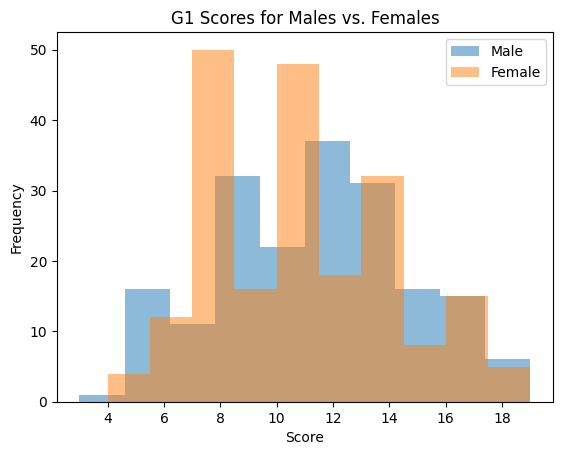

In [ ]:
G1_male.plot.hist(alpha = 0.5, label = "Male",
                   title = "G1 Scores for Males vs. Females")
G1_female.plot.hist(alpha = 0.5, label = "Female").set(xlabel = "Score")
plt.legend()

The main thing that sticks out to me is the different peaks for the female scores. For example, why does it seem like there are bunch of scores around 7 and 11, but not that many in between for the females. Seems like it was less likely to make those exact scores on this test. Further study of how scores are produced is necessary.

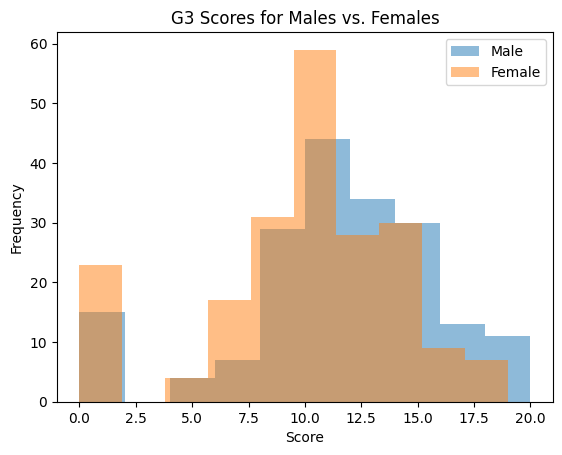

In [ ]:
G3_male.plot.hist(alpha = 0.5, label = "Male",
                   title = "G3 Scores for Males vs. Females")
G3_female.plot.hist(alpha = 0.5, label = "Female").set(xlabel = "Score")
plt.legend()

Male distribution looks slightly to the right of the female distribution at similar percentiles. Larger number of female students scored 10 or below than that of the male students.

<Axes: title={'center': 'G1'}, xlabel='sex', ylabel='Score'>

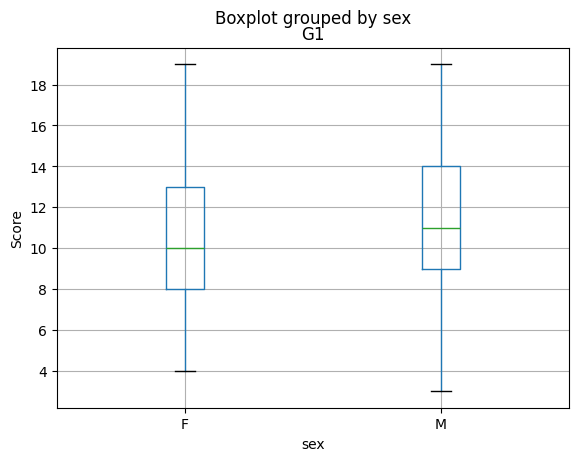

In [83]:
student_data.boxplot(column = ["G1"], by = "sex", ylabel = "Score")

Larger range of male scores on G1, but Q1, median, and q3 were all greater than that of the female scores.

<Axes: title={'center': 'G3'}, xlabel='sex', ylabel='Score'>

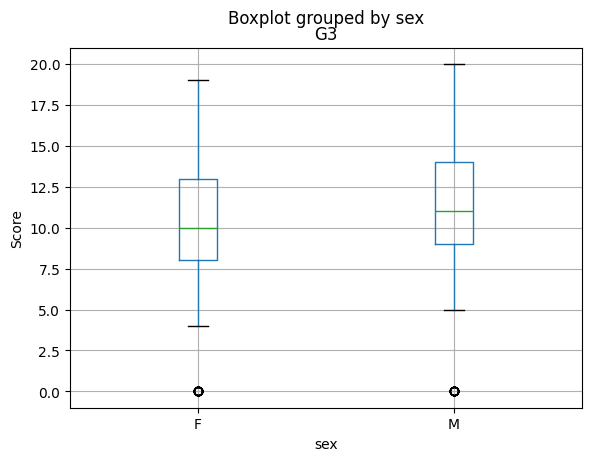

In [84]:
student_data.boxplot(column = ["G3"], by = "sex", ylabel = "Score")

Both genders had outlier scores of 0 on G3. I wonder what led to all of the zero scores. Males have a larger values in each of the 5 numbers shown in the boxplot, ignoring outliers.

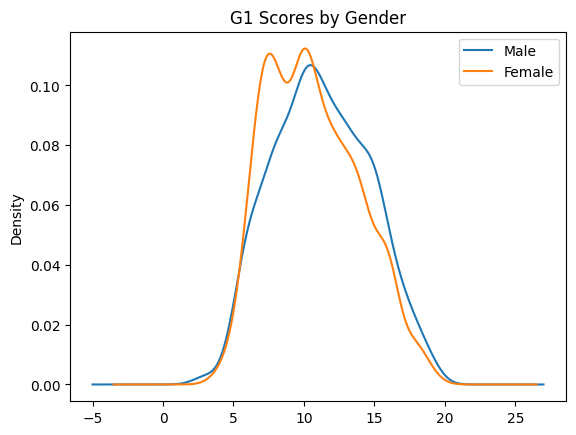

In [116]:
G1_male.plot.density(bw_method = 0.25, label = "Male",
                                  title = "G1 Scores by Gender")
G1_female.plot.density(bw_method = 0.25, label = "Female")
plt.legend()

Looks like the center of the male distribution was a little larger than that of the female distribution of G1 Scores. Male distribution looks more symmetric, while female distribution is skewed a little left.

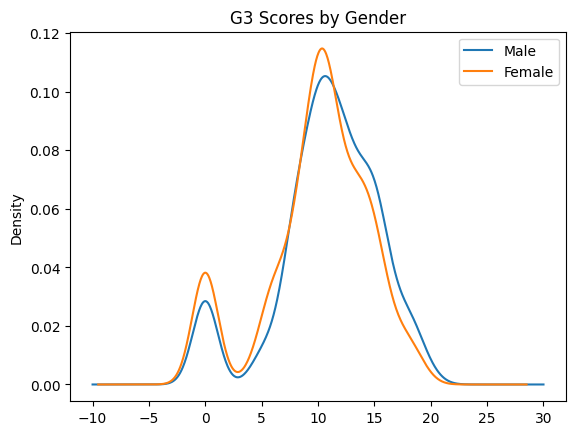

In [104]:
G3_male.plot.density(bw_method = 0.25, label = "Male",
                                  title = "G3 Scores by Gender")
G3_female.plot.density(bw_method = 0.25, label = "Female")
plt.legend()

Looks like G3 scores for both sexes followed very similar distributions.

###Scatter Plots
Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by
a categorical variable in each. Add appropriate labels and titles.

I chose to compare G1 and G2 scores with the G3 on the y-axis. I grouped by gender.

<Axes: title={'center': 'G3 v. G2 scores'}, xlabel='G2', ylabel='G3'>

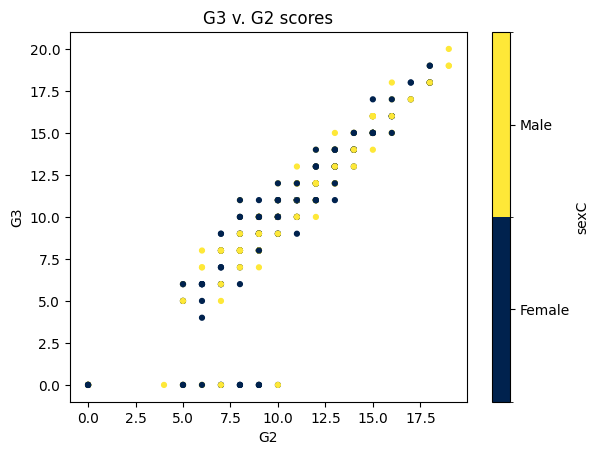

In [115]:
student_data.plot.scatter(x = "G2",
                          y = "G3",
                          c = "sexC",
                          cmap = "cividis",
                          s = 12,
                          title = "G3 v. G2 scores")

As G2 scores improved, G3 scores improve. Positive association, as we would expect.

<Axes: title={'center': 'G3 v. G1 scores'}, xlabel='G1', ylabel='G3'>

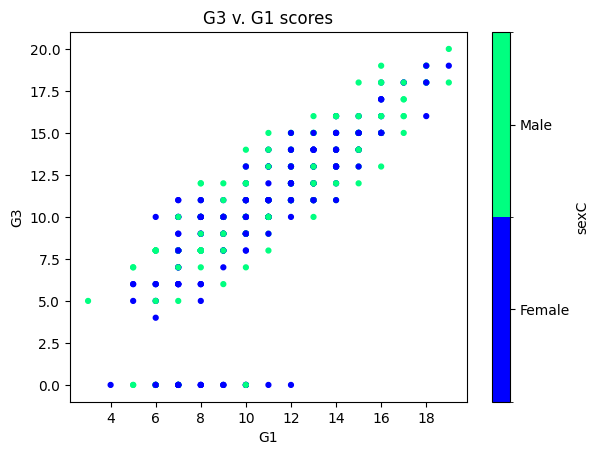

In [114]:
student_data.plot.scatter(x = "G1",
                          y = "G3",
                          c = "sexC",
                          cmap = "winter",
                          s = 12,
                          title = "G3 v. G1 scores")

As G1 scores improved, G3 scores improve. Positive association, as we would expect.

I would have liked to do something fancier, but oh well! Hope it all counts the same!

# HW4 - Part 2 - NFL Data

Football!

## Read in the data
It's football time!

Convert the homeTeam, awayTeam, day, stadium, startTime, toss, roof, and surface to category type variables.

In [151]:
import os

#naming directory and filepath
directory = "/content/drive/MyDrive/Colab Notebooks/Colab Data"
file_name = "scoresFull.csv"

#changing directory and reading in tab delimited data
os.chdir(directory)
NFL_data = pd.read_csv(file_name)

NFL_data["Home_Team"] = NFL_data.homeTeam.astype("category")
NFL_data["Away_Team"] = NFL_data.awayTeam.astype("category")
NFL_data["Day_of_Week"] = NFL_data.day.astype("category")
NFL_data["StadiumC"] = NFL_data.stadium.astype("category")
NFL_data["Start_Time"] = NFL_data.startTime.astype("category")
NFL_data["TossC"] = NFL_data.toss.astype("category")
NFL_data["RoofC"] = NFL_data.roof.astype("category")
NFL_data["SurfaceC"] = NFL_data.surface.astype("category")


NFL_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,HminusAScore,homeSpread,Home_Team,Away_Team,Day_of_Week,StadiumC,Start_Time,TossC,RoofC,SurfaceC
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,-3,-4.0,New York Giants,San Francisco 49ers,Thu,Giants Stadium,8:38pm,Giants,outdoors,grass
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,4,4.5,Chicago Bears,Minnesota Vikings,Sun,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,-6,6.0,Tampa Bay Buccaneers,New Orleans Saints,Sun,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,-6,-3.0,Buffalo Bills,New York Jets,Sun,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,8,6.0,Washington Redskins,Arizona Cardinals,Sun,FedExField,1:05pm,Redskins,outdoors,grass


## Summarize the Data

Removing the playoffs. Sorry Super Bowl Champs.


*"We're talking about playoffs? Playoffs? I just hope we can win a game"* - Jim Mora?

In [150]:
#Make a copy to not mess with original data
NFL_RS_data = NFL_data.copy()

#Setting week to numeric instead of strings. This was causing me problems with removing playoffs.
NFL_RS_data["week"] = pd.to_numeric(NFL_data["week"], errors="coerce")
NFL_RS_data = NFL_RS_data[NFL_data["week"].between(1, 18)]

NFL_RS_data


,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,HminusAScore,homeSpread,Home_Team,Away_Team,Day_of_Week,StadiumC,Start_Time,TossC,RoofC,SurfaceC
0,1.0,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,-3,-4.0,New York Giants,San Francisco 49ers,Thu,Giants Stadium,8:38pm,Giants,outdoors,grass
1,1.0,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,4,4.5,Chicago Bears,Minnesota Vikings,Sun,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay
2,1.0,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,-6,6.0,Tampa Bay Buccaneers,New Orleans Saints,Sun,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass
3,1.0,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,-6,-3.0,Buffalo Bills,New York Jets,Sun,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf
4,1.0,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,8,6.0,Washington Redskins,Arizona Cardinals,Sun,FedExField,1:05pm,Redskins,outdoors,grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,17.0,28-Dec,Sun,2014,Chicago Bears,0,3,3,3,-1,...,4,7.0,Minnesota Vikings,Chicago Bears,Sun,TCF Bank Stadium,1:02pm,Vikings (deferred),outdoors,fieldturf
3456,17.0,28-Dec,Sun,2014,San Diego Chargers,0,7,0,0,-1,...,12,2.5,Kansas City Chiefs,San Diego Chargers,Sun,Arrowhead Stadium,1:03pm,Chiefs (deferred),outdoors,grass
3457,17.0,28-Dec,Sun,2014,Oakland Raiders,7,0,7,0,-1,...,33,14.0,Denver Broncos,Oakland Raiders,Sun,Sports Authority Field at Mile High,4:25pm,Broncos (deferred),outdoors,grass
3458,17.0,28-Dec,Sun,2014,Indianapolis Colts,7,10,0,10,-1,...,-17,-7.5,Tennessee Titans,Indianapolis Colts,Sun,LP Field,1:02pm,Titans,outdoors,grass


In [152]:
NFL_RS_data.columns

Index(['week', 'date', 'day', 'season', 'awayTeam', 'AQ1', 'AQ2', 'AQ3', 'AQ4',
       'AOT', 'AOT2', 'AFinal', 'homeTeam', 'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HOT',
       'HOT2', 'HFinal', 'stadium', 'startTime', 'toss', 'roof', 'surface',
       'duration', 'attendance', 'weather', 'vegasLine', 'OU', 'AfirstDowns',
       'AnetPassYds', 'AtotalYds', 'Aturnovers', 'AtotalPlays', 'HfirstDowns',
       'HnetPassYds', 'HtotalYds', 'Hturnovers', 'HtotalPlays', 'OUvalue',
       'OUresult', 'awayRushAtt', 'awayRushYds', 'awayRushTD', 'awayPassComp',
       'awayPassAtt', 'awayPassYds', 'awayPassTD', 'awayPassInt',
       'awayTimesSacked', 'awaySackYdsLost', 'awayFum', 'awayFumLost',
       'awayNumPen', 'awayPenYds', 'away3rdConv', 'away3rdAtt', 'away4thConv',
       'away4thAtt', 'awayTOP', 'homeRushAtt', 'homeRushYds', 'homeRushTD',
       'homePassComp', 'homePassAtt', 'homePassYds', 'homePassTD',
       'homePassInt', 'homeTimesSacked', 'homeSackYdsLost', 'homeFum',
       'homeFumLost', 'h

In [184]:
vars = ["HFinal", "AFinal", "HnetPassYds", "AnetPassYds"]

NFL_mean_season = NFL_RS_data.groupby("season")[vars].mean()

In [158]:
NFL_RS_data.groupby("season")[vars].std()

,HFinal,AFinal,HnetPassYds,AnetPassYds
season,,,,
2002,10.182152,10.064759,74.979415,75.821830
2003,10.119470,10.251970,68.340726,80.379032
2004,10.400502,10.175596,78.630736,83.939776
2005,9.797383,9.948894,74.947557,74.399215
2006,9.856475,10.386254,75.045169,76.830246
2007,10.568033,10.703215,71.701006,77.447161
2008,10.454499,10.420944,71.540930,76.515185
2009,10.666557,10.672526,82.819553,81.765293
2010,10.251339,10.288187,72.775201,81.412971


In [182]:
NFL_mean_seaweek = NFL_RS_data \
  .groupby(["season", "week"]) \
   [vars] \
   .mean()

In [160]:
NFL_RS_data \
  .groupby(["season", "week"]) \
   [vars] \
   .std()

HFinal     AFinal  HnetPassYds  AnetPassYds
season week                                                
2002   1.0   11.050641   9.680737    68.398830    46.693995
       2.0   10.387292  12.354318    70.103733   114.683750
       3.0   11.460395  11.765100    82.088802    74.620689
       4.0   14.187907   8.939663    86.040401    75.310347
       5.0    8.441460  10.355229    74.115480    47.257362
...                ...        ...          ...          ...
2014   13.0  14.012940   9.470788   122.256016    58.349379
       14.0  10.908712   9.698582    77.079802    67.532585
       15.0   9.750000   8.899438    69.577026    82.904136
       16.0  11.227756  10.052363    74.419420    74.081009
       17.0  10.013324  11.438058    93.845063    80.764576

[221 rows x 4 columns]

In [164]:
NFL_mean_week = NFL_RS_data \
  .groupby(["week"]) \
   [vars] \
   .mean()

In [162]:
NFL_RS_data \
  .groupby(["week"]) \
   [vars] \
   .std()

,HFinal,AFinal,HnetPassYds,AnetPassYds
week,,,,
1.0,10.595541,8.977768,76.022018,76.088746
2.0,9.842384,10.433170,82.892660,82.531438
3.0,10.153955,9.634781,77.442180,81.666163
4.0,10.874704,10.062361,76.616409,79.308560
5.0,10.158379,10.300824,79.689327,76.108011
6.0,9.254422,10.270079,69.740585,80.380955
7.0,10.948924,10.674927,71.666125,75.347537
8.0,10.573121,9.782639,84.381331,77.167984
9.0,9.152849,9.701244,76.930680,72.829111


I was curious in how well the away teams scored compared to home teams. Then, I wondered if the number of passing yards made an impact on score and result of the game.

Future analysis - create new varibles for the difference in passing yards (winner - loser) to see if more passing yards helps you win games.

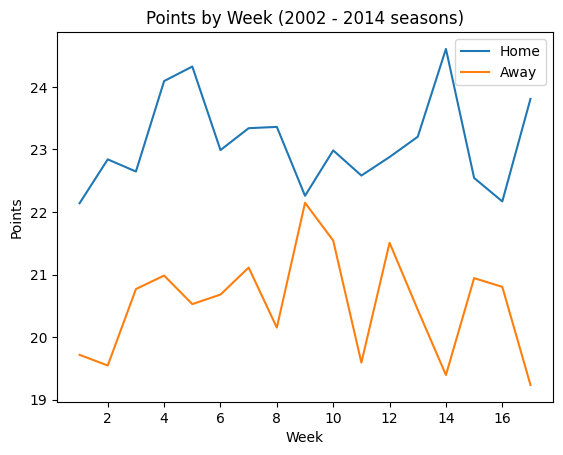

In [179]:
NFL_mean_week["HFinal"].plot(kind="line", label = "Home", legend = True)
NFL_mean_week["AFinal"].plot(kind="line", label = "Away", legend = True)
plt.xlabel("Week")
plt.ylabel("Points")
plt.title("Points by Week (2002 - 2014 seasons)")

plt.show()

The home team is expected to score more points, "Home Field Advantage", but week 9 is unique. On AVERAGE across 12 seasons, the away team scores almost the exact same as the home team. The old saying is that the home team has a 3 point advantage. I'd like to subtract these means and see the trend of the difference.

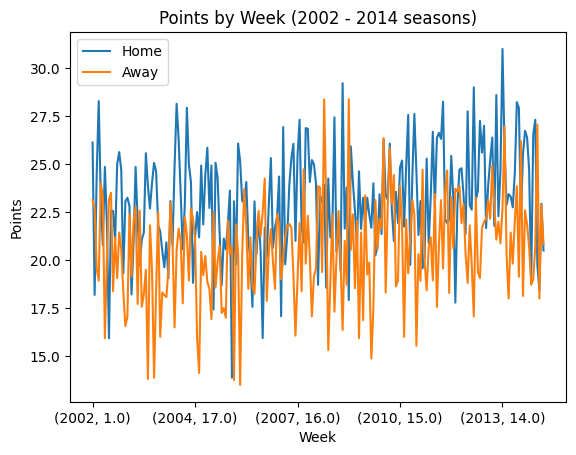

In [183]:
NFL_mean_seaweek["HFinal"].plot(kind="line", label = "Home", legend = True)
NFL_mean_seaweek["AFinal"].plot(kind="line", label = "Away", legend = True)
plt.xlabel("Week")
plt.ylabel("Points")
plt.title("Points by Week (2002 - 2014 seasons)")

plt.show()

How that is hard to look at! You can see that there are some weeks that the away team scored more on average than the home team, but most weeks the home team scored more on average.

Not the best graph in the world!

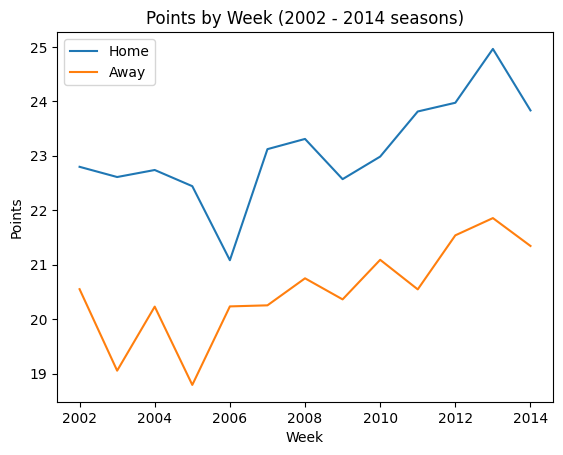

In [185]:
NFL_mean_season

NFL_mean_season["HFinal"].plot(kind="line", label = "Home", legend = True)
NFL_mean_season["AFinal"].plot(kind="line", label = "Away", legend = True)
plt.xlabel("Week")
plt.ylabel("Points")
plt.title("Points by Week (2002 - 2014 seasons)")

plt.show()

Looks like the trend of scoring more points over time is true for both the home team and away team. The 2006 season is interesting for home teams, but generally the home team has increased there scoring by over a point on average over the period of the dataset.

## Function
